In [4]:
%pip install seaborn

In [5]:
#Importing the library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [6]:
#Importing the data

data = pd.read_csv('dataset-grid-toplology-1.csv',sep="\t", on_bad_lines='skip')
data.head()

,No,Time,From,To,sourceaddress,destinationaddress,edgenodeaddress,INSTANCE_ID,rank,rank_min,...,hops,distance,node_type,node_honest_level,energy_efficiency_OF,lattency_min_OF,pdr_OF,congestion_OF,throughput_opt_OF,Data
0,2,00:03.044,1,[25 d],fe80::212:74011101,fe80::212:74033303,fe80::212:74011101,87bb925b-d3ff-46a6-b339-7d48b8993bec,1024.0,256,...,2.0,-12.0,EDGE_NODE,793.0,-0.000479,-1.737107e+12,0.01,0.25,0.044803,97: 0x41D88ACD ABFFFF01 01010001 7412007A 3B3A...
1,3,00:03.993,20,[20 d],fe80::212:7420202020,fe80::212:74044404,fe80::212:74000101,bd86a2f6-b3d6-4c67-a9d3-2a42904c243c,NaN,256,...,2.0,128.0,CHILD_NODE,788.0,-0.000417,-1.737107e+12,0.01,0.25,0.043178,102: 0x61DC18CD AB020202 00027412 00141414 001...
2,4,00:03.993,24,0,fe80::212:7424242424,0,0,0233072f-b8cd-4189-818e-2a4e2b8f1ae7,65535.0,256,...,1.0,256.0,CHILD_NODE,768.0,-0.000416,0.000000e+00,NaN,0.00,0.065104,102: 0x61DC18CD AB020202 00027412 00181818 001...
3,5,00:03.997,42,[10 d],fe80::212:7442424242,fe80::212:74044404,fe80::212:74000101,c0a88d50-730f-4c1a-b21e-83c23f59d9b0,NaN,256,...,1.0,128.0,CHILD_NODE,778.0,-0.000417,-1.737107e+12,0.01,0.25,0.041876,102: 0x61DC18CD AB020202 00027412 002A2A2A 002...
4,6,00:03.997,19,0,fe80::212:7419191919,0,0,3c256cd4-9b1b-43e3-ab9d-a61f12a776ce,65535.0,256,...,1.0,256.0,CHILD_NODE,768.0,-0.000417,0.000000e+00,NaN,0.00,0.065104,102: 0x61DC18CD AB020202 00027412 00131313 001...


In [7]:
# Profile of Data - No. of Rows,Columns,Data Type,Data Byte,Null Values

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17109 entries, 0 to 17108
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   No                    17109 non-null  object 
 1   Time                  17109 non-null  object 
 2   From                  17109 non-null  int64  
 3   To                    17109 non-null  object 
 4   sourceaddress         17109 non-null  object 
 5   destinationaddress    17109 non-null  object 
 6   edgenodeaddress       17109 non-null  object 
 7   INSTANCE_ID           17109 non-null  object 
 8   rank                  16385 non-null  float64
 9   rank_min              17109 non-null  int64  
 10  rank_max              17109 non-null  int64  
 11  node_id               17109 non-null  int64  
 12  ver                   17109 non-null  int64  
 13  ver_min               17109 non-null  int64  
 14  ver_max               17109 non-null  int64  
 15  ver_diff           

In [8]:
#Changing the column name to lower

data.columns = data.columns.str.lower()

In [9]:
data.columns

Index(['no', 'time', 'from', 'to', 'sourceaddress', 'destinationaddress',
       'edgenodeaddress', 'instance_id', 'rank', 'rank_min', 'rank_max',
       'node_id', 'ver', 'ver_min', 'ver_max', 'ver_diff', 'sending_time',
       'sending_rate', 'delta_time', 'received_packets', 'forward_packets',
       'drop_count', 'energy_consumption', 'etx', 'hops', 'distance',
       'node_type', 'node_honest_level', 'energy_efficiency_of',
       'lattency_min_of', 'pdr_of', 'congestion_of', 'throughput_opt_of',
       'data'],
      dtype='object')

In [10]:
# Null Values

data.isna().sum().sort_values(ascending = False)

,0
sending_time,17109
pdr_of,3163
rank,724
node_type,1
lattency_min_of,1
energy_efficiency_of,1
distance,1
congestion_of,1
data,1
node_honest_level,1


In [11]:
#Null Features

na_features = [feature for feature in data.columns if data[feature].isnull().sum()>1]
for features in na_features:
    print(f"{features}:{data[features].isnull().mean()*100: .3f}% missing value")

rank: 4.232% missing value
sending_time: 100.000% missing value
pdr_of: 18.487% missing value


In [12]:
# Handling the null values

data.drop(['sending_time'],axis = 1,inplace = True)
data['rank'] = data['rank'].fillna(data['rank'].mode()[0])
data['pdr_of'] = data['pdr_of'].fillna(data['pdr_of'].mode()[0])
data.dropna()

,no,time,from,to,sourceaddress,destinationaddress,edgenodeaddress,instance_id,rank,rank_min,...,hops,distance,node_type,node_honest_level,energy_efficiency_of,lattency_min_of,pdr_of,congestion_of,throughput_opt_of,data
0,2,00:03.044,1,[25 d],fe80::212:74011101,fe80::212:74033303,fe80::212:74011101,87bb925b-d3ff-46a6-b339-7d48b8993bec,1024.0,256,...,2.0,-12.0,EDGE_NODE,793.0,-0.000479,-1.737107e+12,0.01,0.25,0.044803,97: 0x41D88ACD ABFFFF01 01010001 7412007A 3B3A...
1,3,00:03.993,20,[20 d],fe80::212:7420202020,fe80::212:74044404,fe80::212:74000101,bd86a2f6-b3d6-4c67-a9d3-2a42904c243c,1024.0,256,...,2.0,128.0,CHILD_NODE,788.0,-0.000417,-1.737107e+12,0.01,0.25,0.043178,102: 0x61DC18CD AB020202 00027412 00141414 001...
2,4,00:03.993,24,0,fe80::212:7424242424,0,0,0233072f-b8cd-4189-818e-2a4e2b8f1ae7,65535.0,256,...,1.0,256.0,CHILD_NODE,768.0,-0.000416,0.000000e+00,0.01,0.00,0.065104,102: 0x61DC18CD AB020202 00027412 00181818 001...
3,5,00:03.997,42,[10 d],fe80::212:7442424242,fe80::212:74044404,fe80::212:74000101,c0a88d50-730f-4c1a-b21e-83c23f59d9b0,1024.0,256,...,1.0,128.0,CHILD_NODE,778.0,-0.000417,-1.737107e+12,0.01,0.25,0.041876,102: 0x61DC18CD AB020202 00027412 002A2A2A 002...
4,6,00:03.997,19,0,fe80::212:7419191919,0,0,3c256cd4-9b1b-43e3-ab9d-a61f12a776ce,65535.0,256,...,1.0,256.0,CHILD_NODE,768.0,-0.000417,0.000000e+00,0.01,0.00,0.065104,102: 0x61DC18CD AB020202 00027412 00131313 001...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17103,17612,02:08.838,50,0,fe80::212:7450505050,0,0,dc782454-d46e-4548-841a-1702b0e6e41a,65535.0,256,...,1.0,256.0,CHILD_NODE,768.0,-0.000417,0.000000e+00,0.01,0.00,0.065104,102: 0x61DC57CD AB050505 00057412 00323232 003...
17104,17613,02:08.842,46,[5 d],fe80::212:7446464646,fe80::212:7415151515,fe80::212:74000101,c0c42659-a970-487c-9a4f-74836d36dbd8,512.0,256,...,1.0,128.0,CHILD_NODE,773.0,-0.002198,-1.737107e+12,0.01,0.25,0.041982,65: 0x61DC80CD AB272727 00277412 002E2E2E 002E...
17105,17614,02:08.842,37,0,fe80::212:7437373737,0,0,8ae88fa8-8adb-47bf-822d-5eb82f0a0425,65535.0,256,...,1.0,256.0,CHILD_NODE,768.0,-0.000417,0.000000e+00,0.01,0.00,0.065104,102: 0x61DCAACD AB1C1C1C 001C7412 00252525 002...
17106,17615,02:08.846,50,[31 d],fe80::212:7450505050,fe80::212:74011101,fe80::212:74000101,d8d142da-8741-45e3-a68e-7eddac41f31c,1280.0,256,...,3.0,-12.0,CHILD_NODE,799.0,-0.000416,-1.737107e+12,0.01,0.25,0.039032,102: 0x61DC57CD AB050505 00057412 00323232 003...


In [13]:
data.isnull().sum().sum()

9

In [14]:
# Duplicated value

data[data.duplicated()]

,no,time,from,to,sourceaddress,destinationaddress,edgenodeaddress,instance_id,rank,rank_min,...,hops,distance,node_type,node_honest_level,energy_efficiency_of,lattency_min_of,pdr_of,congestion_of,throughput_opt_of,data


In [15]:
# The unique values in the data

print("Unique values per column")
data.nunique().sort_values(ascending = True)

Unique values per column


,0
ver,1
ver_min,1
ver_diff,1
ver_max,1
rank_max,1
rank_min,1
pdr_of,1
congestion_of,2
distance,3
hops,3


In [16]:
# Checking the unique value in column

for i in data.columns:
    print(f"Unique value in {i}")
    print(data[i].unique() , '\n')

Unique value in no
['2' '3' '4' ... '17615' '17616' '17617+1'] 

Unique value in time
['00:03.044' '00:03.993' '00:03.997' ... '02:08.846' '02:08.850'
 '02:08.851'] 

Unique value in from
[ 1 20 24 42 19 21 28 32  4 17  9 41  6 12  3  2 34 33 46 29 51 15 37 14
 48 31 18 43 10 26 30 36 44 25  5 16  8 35 22 45 52 50 27 11 39 13 23 47
 40 38 49  7] 

Unique value in to
['[25 d]' '[20 d]' '0' '[10 d]' '[13 d]' '[3 d]' '[35 d]' '[19 d]' '[4 d]'
 '[43 d]' '[39 d]' '44' '[22 d]' '[17 d]' '[31 d]' '[23 d]' '[28 d]'
 '[27 d]' '[38 d]' '[24 d]' '[44 d]' '[8 d]' '[30 d]' '[26 d]' '[12 d]'
 '[21 d]' '[5 d]' '[11 d]' '[6 d]' '[33 d]' '[7 d]' '[34 d]' '[41 d]'
 '[36 d]' '[42 d]' '[14 d]' '24,32' '26,34' '[37 d]' '41' '38,40' '[29 d]'
 '[32 d]' '[18 d]' '1,31' '[9 d]' '2,30' '31' '1,34' '24,30' '[16 d]'
 '[15 d]' '31,51' '32' '22' '2' '26' '34' '13,26' '1' '7,22' '49' '24'
 '36' '13,34' '9,34' '40' '5,36' '17' '2,44' '40,48' '5' '30' '48'] 

Unique value in sourceaddress
['fe80::212:74011101' 'fe80::

In [17]:
import re

def get_number(d):
    if isinstance(d, str):
        numbers = re.findall(r'\d+', d)
        return numbers[0] if numbers else '0'
    return '0'

In [18]:
data['to'] = data['to'].apply(get_number)

In [19]:
data['to'].unique()

array(['25', '20', '0', '10', '13', '3', '35', '19', '4', '43', '39',
       '44', '22', '17', '31', '23', '28', '27', '38', '24', '8', '30',
       '26', '12', '21', '5', '11', '6', '33', '7', '34', '41', '36',
       '42', '14', '37', '29', '32', '18', '1', '9', '2', '16', '15',
       '49', '40', '48'], dtype=object)

In [20]:
data.loc[data['sending_rate'] == 0]

,no,time,from,to,sourceaddress,destinationaddress,edgenodeaddress,instance_id,rank,rank_min,...,hops,distance,node_type,node_honest_level,energy_efficiency_of,lattency_min_of,pdr_of,congestion_of,throughput_opt_of,data
4892,5086,01:01.349,27,31,fe80::212:7427272727,fe80::212:74022202,fe80::212:74000101,26480cd7-3eba-4c7e-9b36-2b759517d481,1280.0,256,...,3.0,-12.0,CHILD_NODE,799.0,-0.000416,-1.737107e+12,0.01,0.25,0.041254,102: 0x61DC36CD AB0A0A0A 000A7412 001B1B1B 001...


In [21]:
data['sending_rate'].value_counts()

,count
sending_rate,
5,11322
6,5368
2,196
3,144
4,78
0,1


In [22]:
mode_value = data['sending_rate'].mode()[0]

def replace_zero(x):
    if x == 0:
        return mode_value
    return x

data['sending_rate'] = data['sending_rate'].apply(replace_zero)

In [23]:
data['sending_rate'].value_counts()

,count
sending_rate,
5,11323
6,5368
2,196
3,144
4,78


In [24]:
data.dtypes

,0
no,object
time,object
from,int64
to,object
sourceaddress,object
destinationaddress,object
edgenodeaddress,object
instance_id,object
rank,float64
rank_min,int64


In [25]:
#Numerical Features

numerical_feature = [feature for feature in data.columns if data[feature].dtype != 'O']
print("No. of Numerical Column: ",len(numerical_feature))
data[numerical_feature].head()

No. of Numerical Column:  24


,from,rank,rank_min,rank_max,node_id,ver,ver_min,ver_max,ver_diff,sending_rate,...,energy_consumption,etx,hops,distance,node_honest_level,energy_efficiency_of,lattency_min_of,pdr_of,congestion_of,throughput_opt_of
0,1,1024.0,256,2048,1,240,0,240,240,2,...,3088,372,2.0,-12.0,793.0,-0.000479,-1.737107e+12,0.01,0.25,0.044803
1,20,1024.0,256,2048,20,240,0,240,240,2,...,3400,386,2.0,128.0,788.0,-0.000417,-1.737107e+12,0.01,0.25,0.043178
2,24,65535.0,256,2048,24,240,0,240,240,2,...,3401,256,1.0,256.0,768.0,-0.000416,0.000000e+00,0.01,0.00,0.065104
3,42,1024.0,256,2048,42,240,0,240,240,2,...,3400,398,1.0,128.0,778.0,-0.000417,-1.737107e+12,0.01,0.25,0.041876
4,19,65535.0,256,2048,19,240,0,240,240,2,...,3400,256,1.0,256.0,768.0,-0.000417,0.000000e+00,0.01,0.00,0.065104


In [26]:
# Categorical Columns

categorical_feature = [feature for feature in data.columns if data[feature].dtype == 'O']
print("No. of Categorical Column: ",len(categorical_feature))
data[categorical_feature].head()

No. of Categorical Column:  9


,no,time,to,sourceaddress,destinationaddress,edgenodeaddress,instance_id,node_type,data
0,2,00:03.044,25,fe80::212:74011101,fe80::212:74033303,fe80::212:74011101,87bb925b-d3ff-46a6-b339-7d48b8993bec,EDGE_NODE,97: 0x41D88ACD ABFFFF01 01010001 7412007A 3B3A...
1,3,00:03.993,20,fe80::212:7420202020,fe80::212:74044404,fe80::212:74000101,bd86a2f6-b3d6-4c67-a9d3-2a42904c243c,CHILD_NODE,102: 0x61DC18CD AB020202 00027412 00141414 001...
2,4,00:03.993,0,fe80::212:7424242424,0,0,0233072f-b8cd-4189-818e-2a4e2b8f1ae7,CHILD_NODE,102: 0x61DC18CD AB020202 00027412 00181818 001...
3,5,00:03.997,10,fe80::212:7442424242,fe80::212:74044404,fe80::212:74000101,c0a88d50-730f-4c1a-b21e-83c23f59d9b0,CHILD_NODE,102: 0x61DC18CD AB020202 00027412 002A2A2A 002...
4,6,00:03.997,0,fe80::212:7419191919,0,0,3c256cd4-9b1b-43e3-ab9d-a61f12a776ce,CHILD_NODE,102: 0x61DC18CD AB020202 00027412 00131313 001...


In [27]:
#Statistical Analysis - Mean,Median,Mode,Min and Max

print("Numerical Statistical Analysis")
print(data[numerical_feature].describe().T)
print("=" * 90)
print("Categorical Statistical Analysis")
print(data[categorical_feature].describe().T)

Numerical Statistical Analysis
                        count          mean           std           min  \
from                  17109.0  2.447437e+01  1.494313e+01  1.000000e+00   
rank                  17109.0  1.228862e+04  2.442067e+04  5.120000e+02   
rank_min              17109.0  2.560000e+02  0.000000e+00  2.560000e+02   
rank_max              17109.0  2.048000e+03  0.000000e+00  2.048000e+03   
node_id               17109.0  2.447437e+01  1.494313e+01  1.000000e+00   
ver                   17109.0  2.400000e+02  0.000000e+00  2.400000e+02   
ver_min               17109.0  0.000000e+00  0.000000e+00  0.000000e+00   
ver_max               17109.0  2.400000e+02  0.000000e+00  2.400000e+02   
ver_diff              17109.0  2.400000e+02  0.000000e+00  2.400000e+02   
sending_rate          17109.0  5.257993e+00  6.233334e-01  2.000000e+00   
delta_time            17109.0  2.160305e+07  4.008149e+04  2.156792e+07   
received_packets      17109.0  6.114918e+02  1.062080e+03  0.000000e+

In [28]:
# Discrete Features
discrete_feature = [feature for feature in data[numerical_feature] if data[numerical_feature][feature].nunique() < 100]
print("Discrete Variables Count:", len(discrete_feature))

print(data[discrete_feature].head())

Discrete Variables Count: 18
   from     rank  rank_min  rank_max  node_id  ver  ver_min  ver_max  \
0     1   1024.0       256      2048        1  240        0      240   
1    20   1024.0       256      2048       20  240        0      240   
2    24  65535.0       256      2048       24  240        0      240   
3    42   1024.0       256      2048       42  240        0      240   
4    19  65535.0       256      2048       19  240        0      240   

   ver_diff  sending_rate  drop_count  etx  hops  distance  node_honest_level  \
0       240             2          25  372   2.0     -12.0              793.0   
1       240             2          20  386   2.0     128.0              788.0   
2       240             2           0  256   1.0     256.0              768.0   
3       240             2          10  398   1.0     128.0              778.0   
4       240             2           0  256   1.0     256.0              768.0   

   pdr_of  congestion_of  throughput_opt_of  
0    

In [29]:
# Continous Features
continous_feature = [feature for feature in data[numerical_feature] if data[numerical_feature][feature].nunique() > 100]
print("Continous Variables Count:", len(continous_feature))

print(data[continous_feature].head())

Continous Variables Count: 6
   delta_time  received_packets  forward_packets  energy_consumption  \
0    21567917              3395             3420                3088   
1    21567917              3440             3460                3400   
2    21567917                 0                0                3401   
3    21567917                10               20                3400   
4    21567917                 0                0                3400   

   energy_efficiency_of  lattency_min_of  
0             -0.000479    -1.737107e+12  
1             -0.000417    -1.737107e+12  
2             -0.000416     0.000000e+00  
3             -0.000417    -1.737107e+12  
4             -0.000417     0.000000e+00  


In [30]:
# Covariance

cov_matrix = data[numerical_feature].cov().round(4)
print(cov_matrix)

                              from          rank  rank_min  rank_max  \
from                  2.232972e+02 -7.533412e+03       0.0       0.0   
rank                 -7.533412e+03  5.963691e+08       0.0       0.0   
rank_min              0.000000e+00  0.000000e+00       0.0       0.0   
rank_max              0.000000e+00  0.000000e+00       0.0       0.0   
node_id               2.232972e+02 -7.533412e+03       0.0       0.0   
ver                   0.000000e+00  0.000000e+00       0.0       0.0   
ver_min               0.000000e+00  0.000000e+00       0.0       0.0   
ver_max               0.000000e+00  0.000000e+00       0.0       0.0   
ver_diff              0.000000e+00  0.000000e+00       0.0       0.0   
sending_rate         -2.980000e-01 -1.167270e+03       0.0       0.0   
delta_time            4.092869e+04  1.238358e+08       0.0       0.0   
received_packets     -4.375137e+02 -6.825462e+06       0.0       0.0   
forward_packets      -4.209967e+02 -7.076453e+06       0.0      

In [31]:
# Correlation

corr_matrix = data[numerical_feature].corr().round(4)
print(corr_matrix)

                        from    rank  rank_min  rank_max  node_id  ver  \
from                  1.0000 -0.0206       NaN       NaN   1.0000  NaN   
rank                 -0.0206  1.0000       NaN       NaN  -0.0206  NaN   
rank_min                 NaN     NaN       NaN       NaN      NaN  NaN   
rank_max                 NaN     NaN       NaN       NaN      NaN  NaN   
node_id               1.0000 -0.0206       NaN       NaN   1.0000  NaN   
ver                      NaN     NaN       NaN       NaN      NaN  NaN   
ver_min                  NaN     NaN       NaN       NaN      NaN  NaN   
ver_max                  NaN     NaN       NaN       NaN      NaN  NaN   
ver_diff                 NaN     NaN       NaN       NaN      NaN  NaN   
sending_rate         -0.0320 -0.0767       NaN       NaN  -0.0320  NaN   
delta_time            0.0683  0.1265       NaN       NaN   0.0683  NaN   
received_packets     -0.0276 -0.2632       NaN       NaN  -0.0276  NaN   
forward_packets      -0.0264 -0.2718  

In [32]:
data[numerical_feature].skew().round(4)

,0
from,0.0352
rank,1.7217
rank_min,0.0000
rank_max,0.0000
node_id,0.0352
ver,0.0000
ver_min,0.0000
ver_max,0.0000
ver_diff,0.0000
sending_rate,-1.5913


In [33]:
data[numerical_feature].kurtosis().round(4)

,0
from,-1.1444
rank,0.9651
rank_min,0.0000
rank_max,0.0000
node_id,-1.1444
ver,0.0000
ver_min,0.0000
ver_max,0.0000
ver_diff,0.0000
sending_rate,7.7279


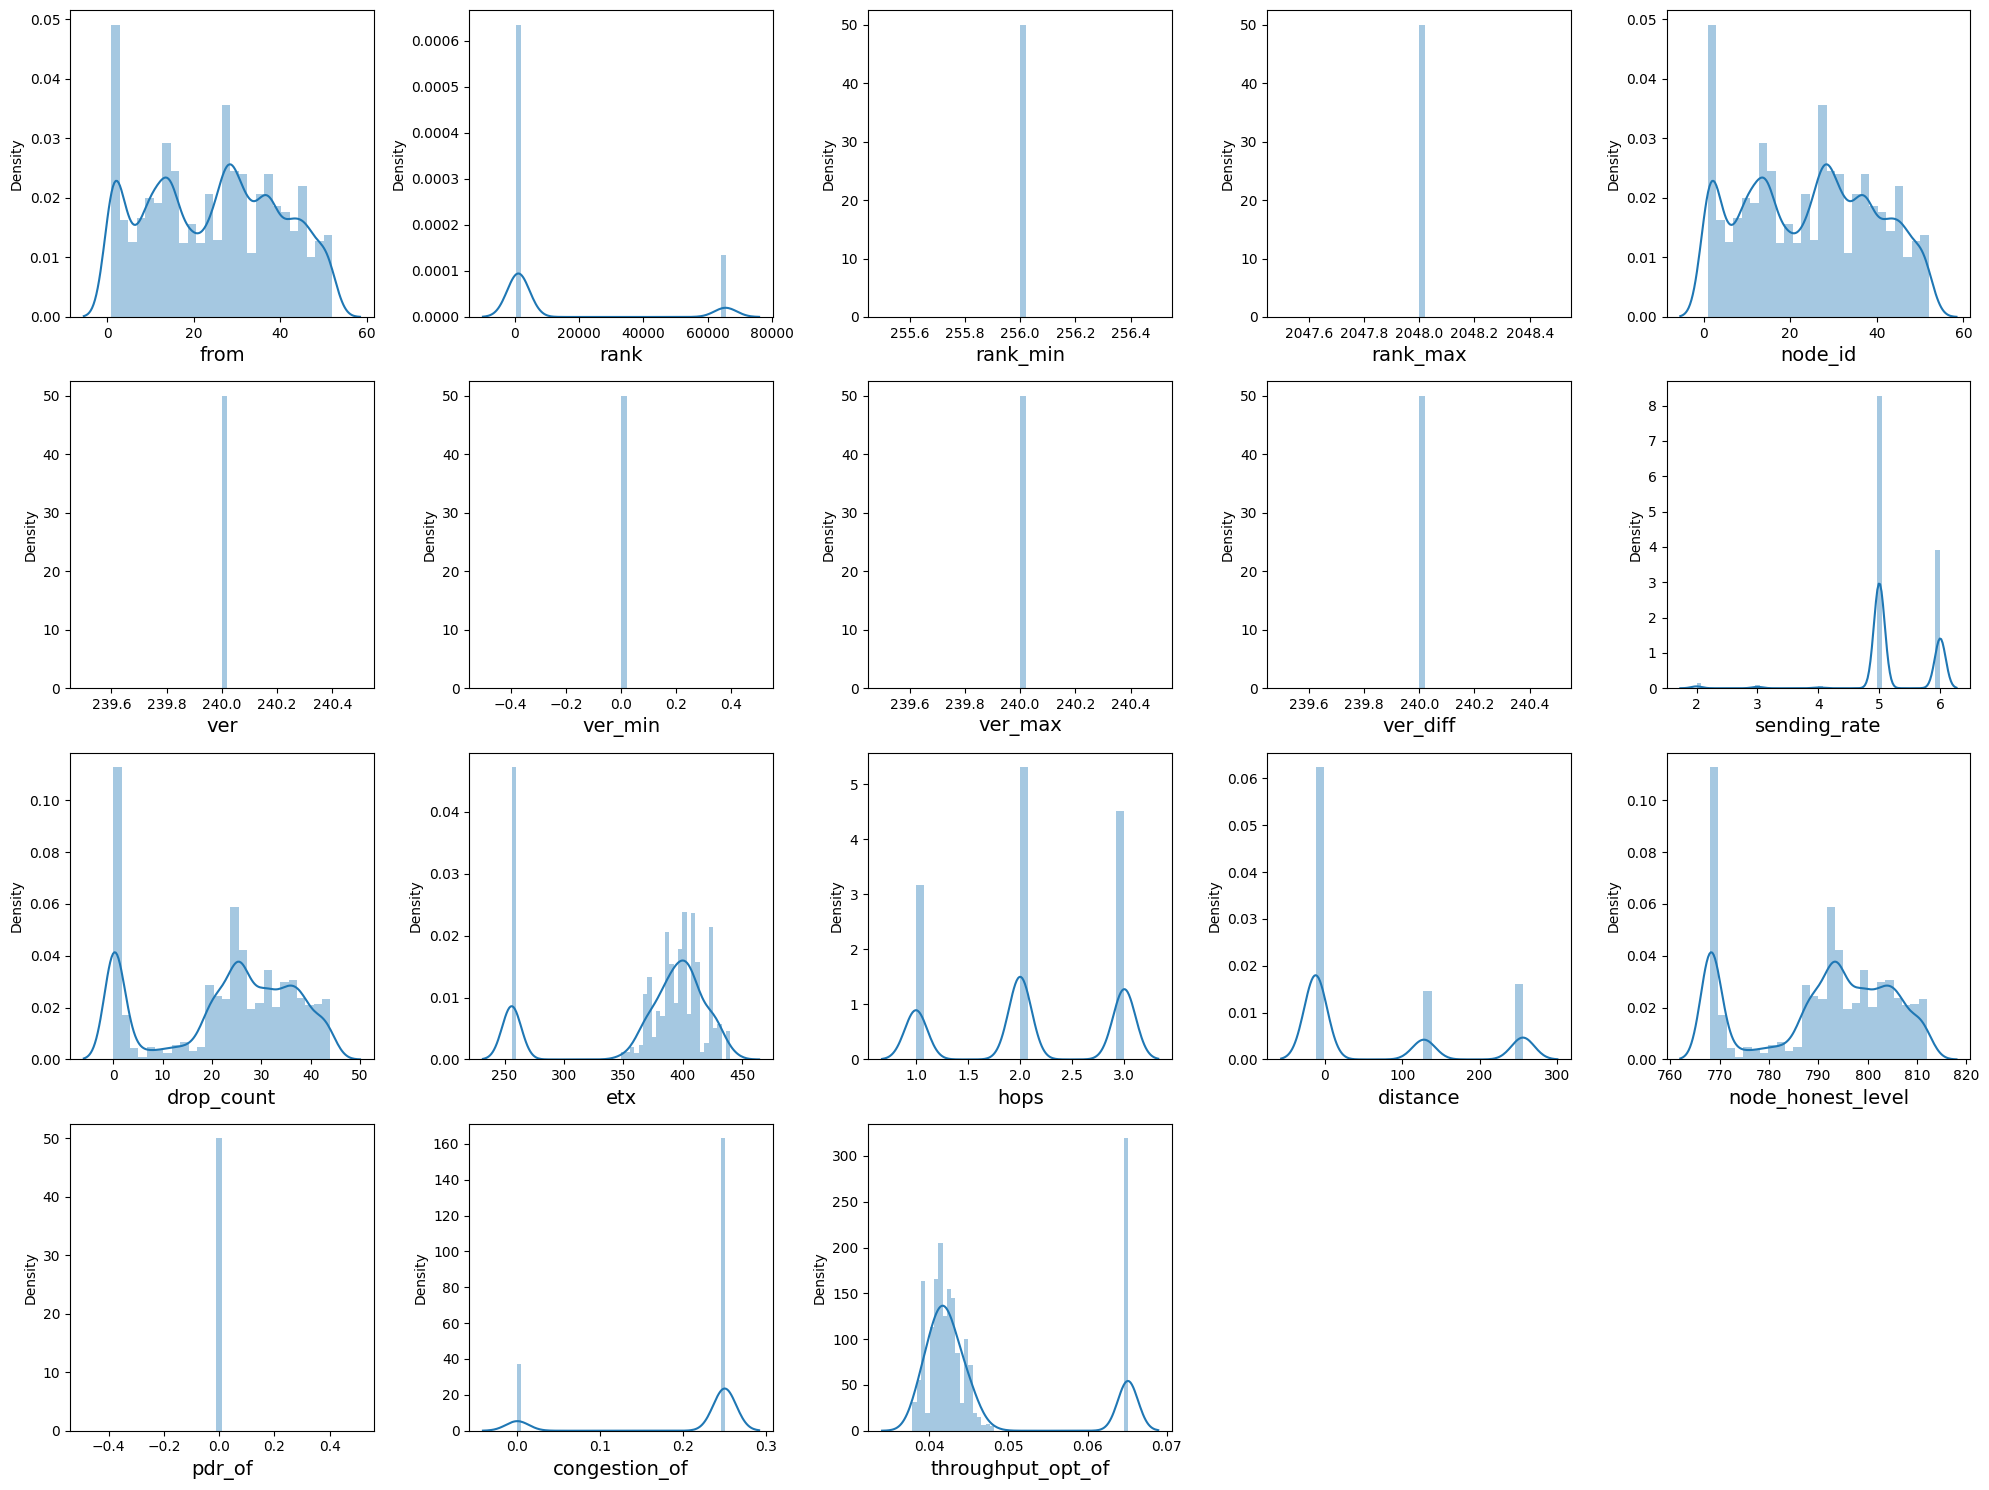

In [34]:
#Univariate Analysis of discrete feature

plt.figure(figsize=(20,15),facecolor='White')
plotnumber = 1

for column in data[discrete_feature]:
    if plotnumber < 36:
        ax = plt.subplot(4,5,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=14)
    plotnumber += 1
plt.tight_layout()

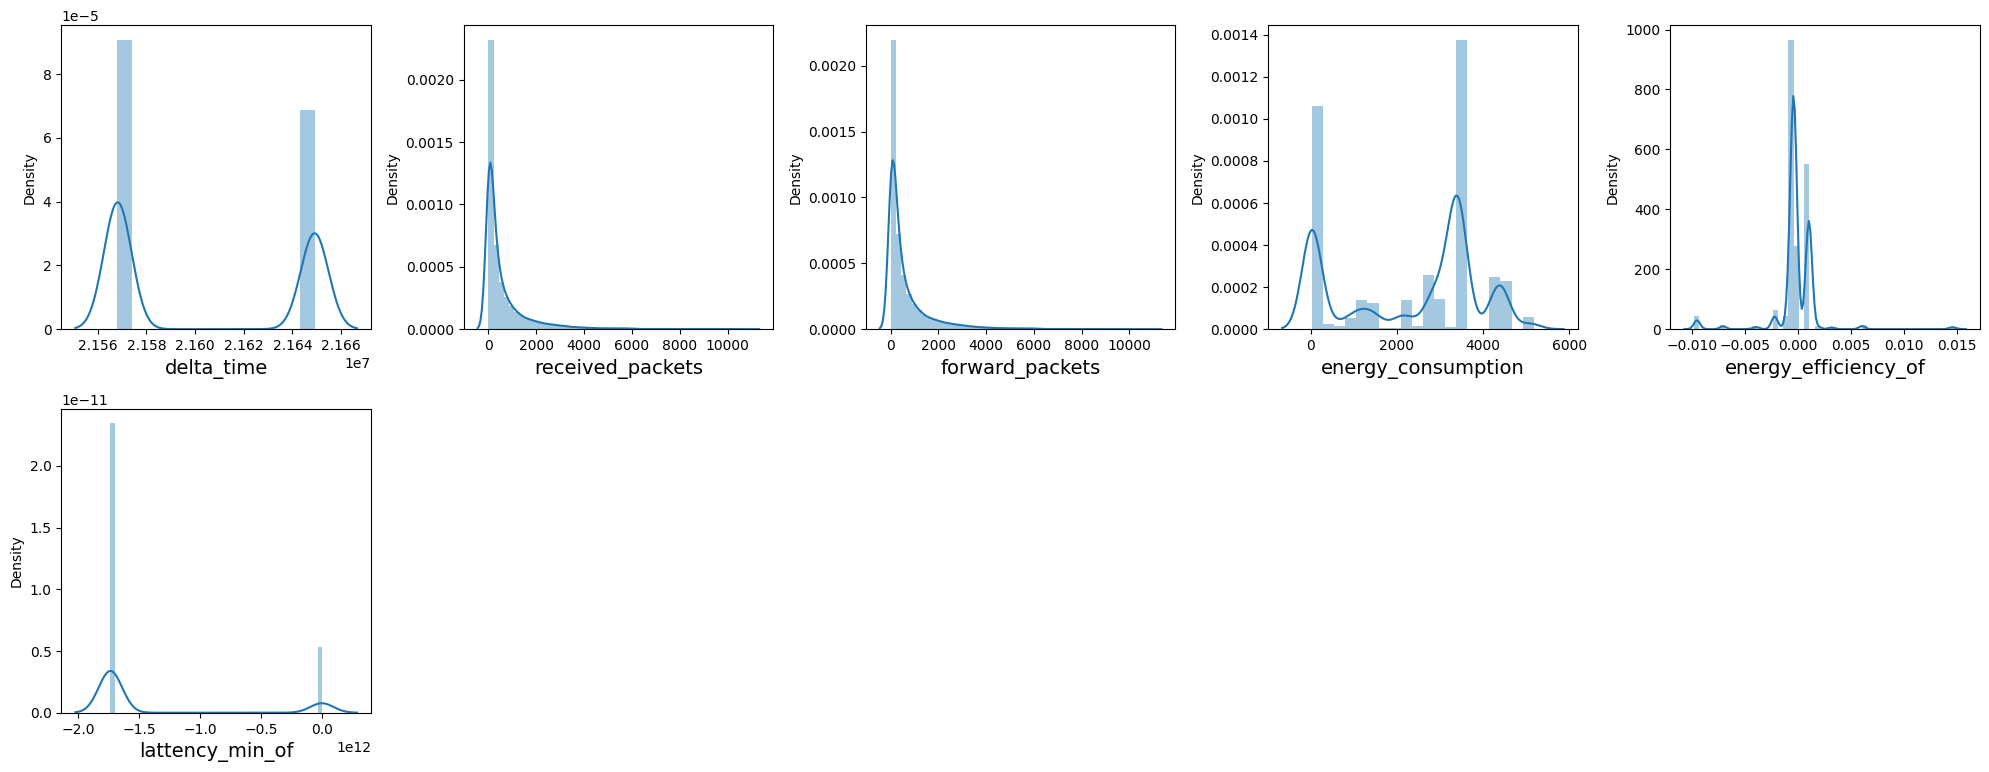

In [35]:
#Univariate Analysis of continous feature

plt.figure(figsize=(20,15),facecolor='White')
plotnumber = 1

for column in data[continous_feature]:
    if plotnumber < 36:
        ax = plt.subplot(4,5,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=14)
    plotnumber += 1
plt.tight_layout()

In [36]:
data[categorical_feature].head()

,no,time,to,sourceaddress,destinationaddress,edgenodeaddress,instance_id,node_type,data
0,2,00:03.044,25,fe80::212:74011101,fe80::212:74033303,fe80::212:74011101,87bb925b-d3ff-46a6-b339-7d48b8993bec,EDGE_NODE,97: 0x41D88ACD ABFFFF01 01010001 7412007A 3B3A...
1,3,00:03.993,20,fe80::212:7420202020,fe80::212:74044404,fe80::212:74000101,bd86a2f6-b3d6-4c67-a9d3-2a42904c243c,CHILD_NODE,102: 0x61DC18CD AB020202 00027412 00141414 001...
2,4,00:03.993,0,fe80::212:7424242424,0,0,0233072f-b8cd-4189-818e-2a4e2b8f1ae7,CHILD_NODE,102: 0x61DC18CD AB020202 00027412 00181818 001...
3,5,00:03.997,10,fe80::212:7442424242,fe80::212:74044404,fe80::212:74000101,c0a88d50-730f-4c1a-b21e-83c23f59d9b0,CHILD_NODE,102: 0x61DC18CD AB020202 00027412 002A2A2A 002...
4,6,00:03.997,0,fe80::212:7419191919,0,0,3c256cd4-9b1b-43e3-ab9d-a61f12a776ce,CHILD_NODE,102: 0x61DC18CD AB020202 00027412 00131313 001...


In [37]:
import hashlib

def hash_value(value):
    """
    Hashes IPv6 addresses using MD5 and UUIDs using SHA-256.
    Returns a hashed integer in the range (0 to 10**8).
    """
    if pd.isna(value) or value == '0':
        return 0
    elif '::' in value:
        return int(hashlib.md5(value.encode()).hexdigest(),16) % (10*8)
    elif "-" in value:
        return int(hashlib.sha256(value.encode()).hexdigest(),16) % (10*8)
    else:
        return None

In [38]:
columns_to_hash = ['edgenodeaddress', 'sourceaddress', 'destinationaddress', 'instance_id','data']

In [39]:
data[columns_to_hash] = data[columns_to_hash].applymap(hash_value)

In [40]:
data[columns_to_hash]

,edgenodeaddress,sourceaddress,destinationaddress,instance_id,data
0,69,69,58,51,NaN
1,22,6,30,59,NaN
2,0,49,0,77,NaN
3,22,49,30,10,NaN
4,0,22,0,39,NaN
...,...,...,...,...,...
17104,22,36,50,29,NaN
17105,0,76,0,57,NaN
17106,22,76,69,5,NaN
17107,22,6,69,34,NaN


In [41]:
data.sample(3)

,no,time,from,to,sourceaddress,destinationaddress,edgenodeaddress,instance_id,rank,rank_min,...,hops,distance,node_type,node_honest_level,energy_efficiency_of,lattency_min_of,pdr_of,congestion_of,throughput_opt_of,data
14108,14587,01:57.254,3,0,58,0,0,63,65535.0,256,...,1.0,256.0,CHILD_NODE,768.0,-0.000293,0.000000e+00,0.01,0.00,0.065104,NaN
9167,9519,01:32.265,4,43,30,69,22,33,1536.0,256,...,3.0,-12.0,CHILD_NODE,811.0,-0.000292,-1.737107e+12,0.01,0.25,0.042409,NaN
1498,1545,00:27.058,49,21,52,65,22,67,1024.0,256,...,2.0,-12.0,CHILD_NODE,789.0,-0.000417,-1.737107e+12,0.01,0.25,0.040064,NaN


In [42]:
data[categorical_feature].head()

,no,time,to,sourceaddress,destinationaddress,edgenodeaddress,instance_id,node_type,data
0,2,00:03.044,25,69,58,69,51,EDGE_NODE,NaN
1,3,00:03.993,20,6,30,22,59,CHILD_NODE,NaN
2,4,00:03.993,0,49,0,0,77,CHILD_NODE,NaN
3,5,00:03.997,10,49,30,22,10,CHILD_NODE,NaN
4,6,00:03.997,0,22,0,0,39,CHILD_NODE,NaN


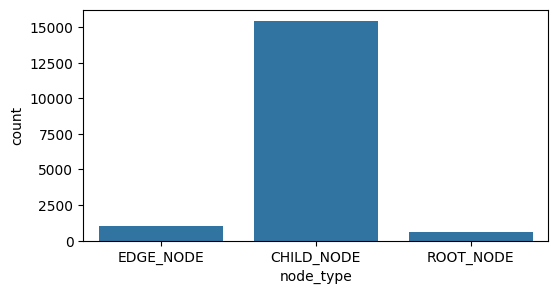

In [43]:
plt.figure(figsize = (6,3))
sns.countplot(data=data, x='node_type')
plt.show()

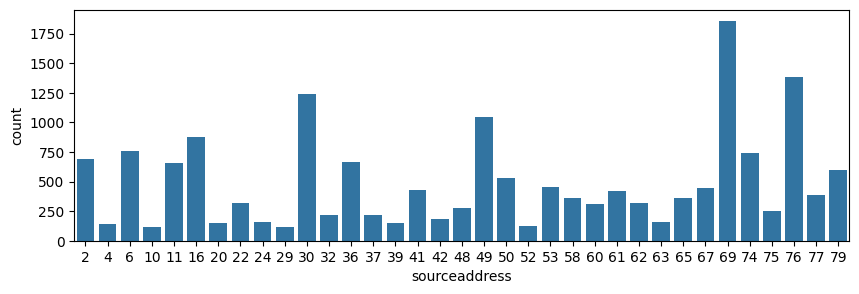

In [44]:
plt.figure(figsize = (10,3))
sns.countplot(data=data, x='sourceaddress')
plt.show()

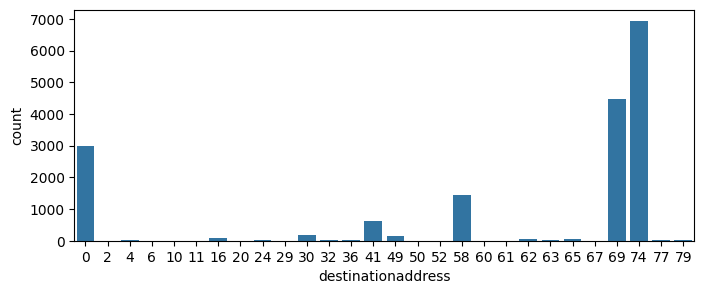

In [45]:
plt.figure(figsize = (8,3))
sns.countplot(data=data, x='destinationaddress')
plt.show()

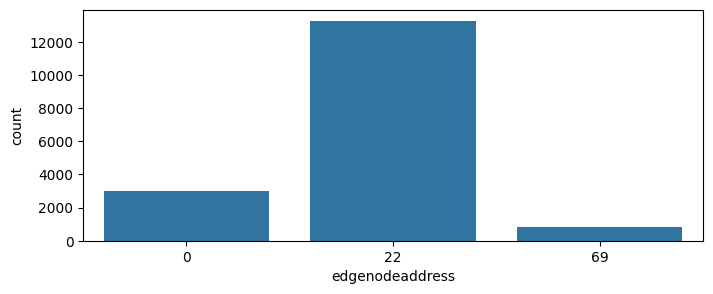

In [46]:
plt.figure(figsize = (8,3))
sns.countplot(data=data, x='edgenodeaddress')
plt.show()

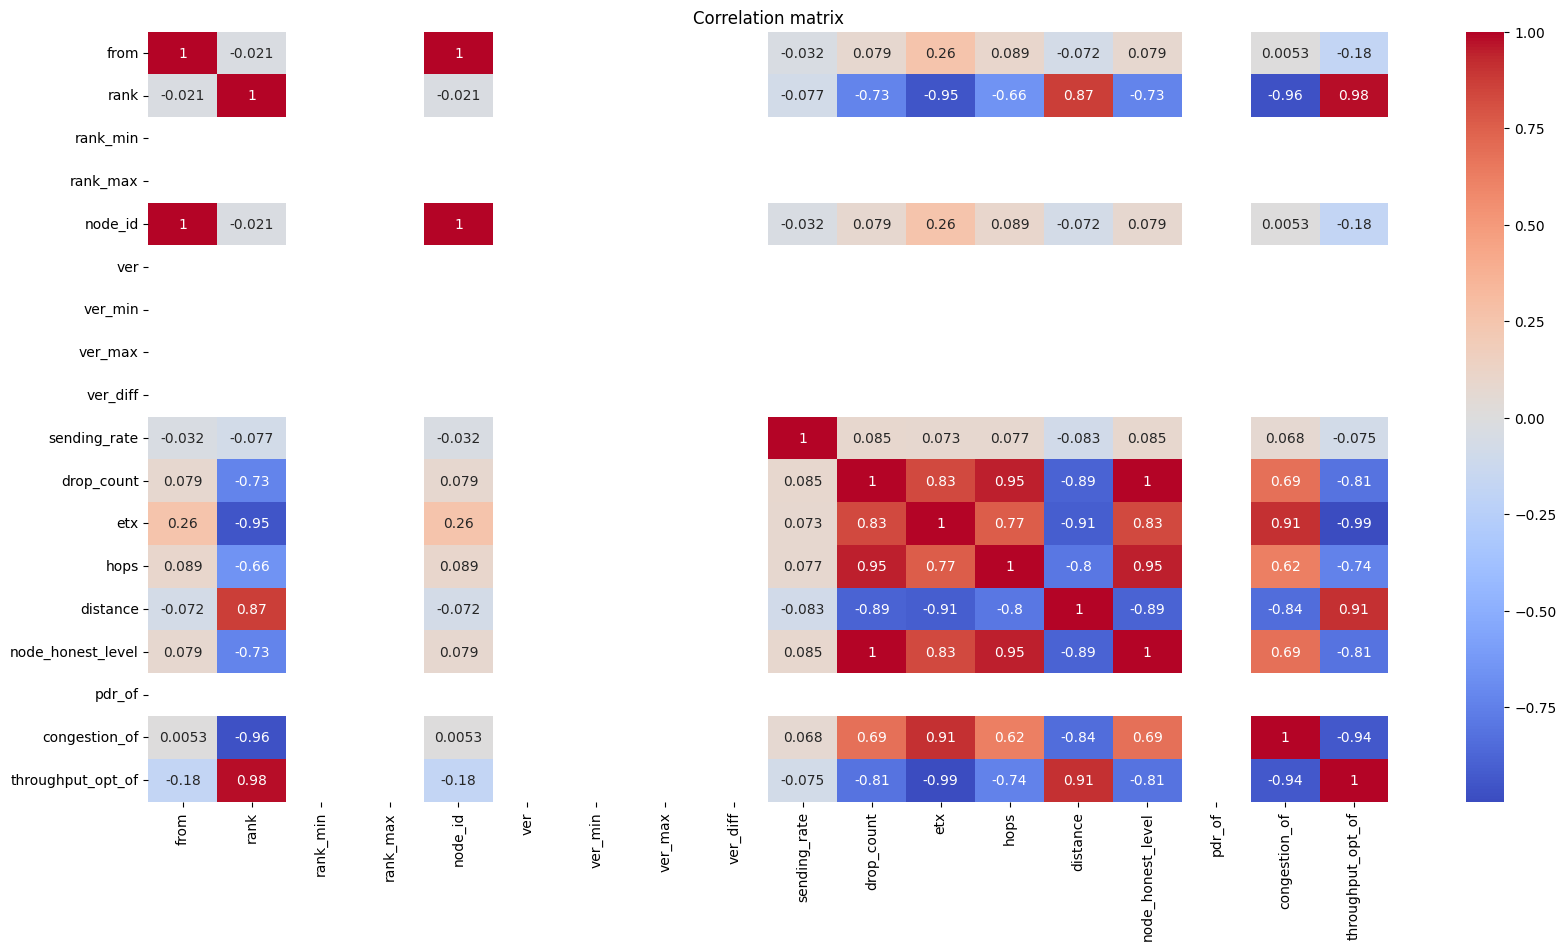

In [47]:
plt.figure(figsize=(20,10))
sns.heatmap(data[discrete_feature].corr(),annot=True,cmap = 'coolwarm')
plt.title("Correlation matrix")
plt.show()

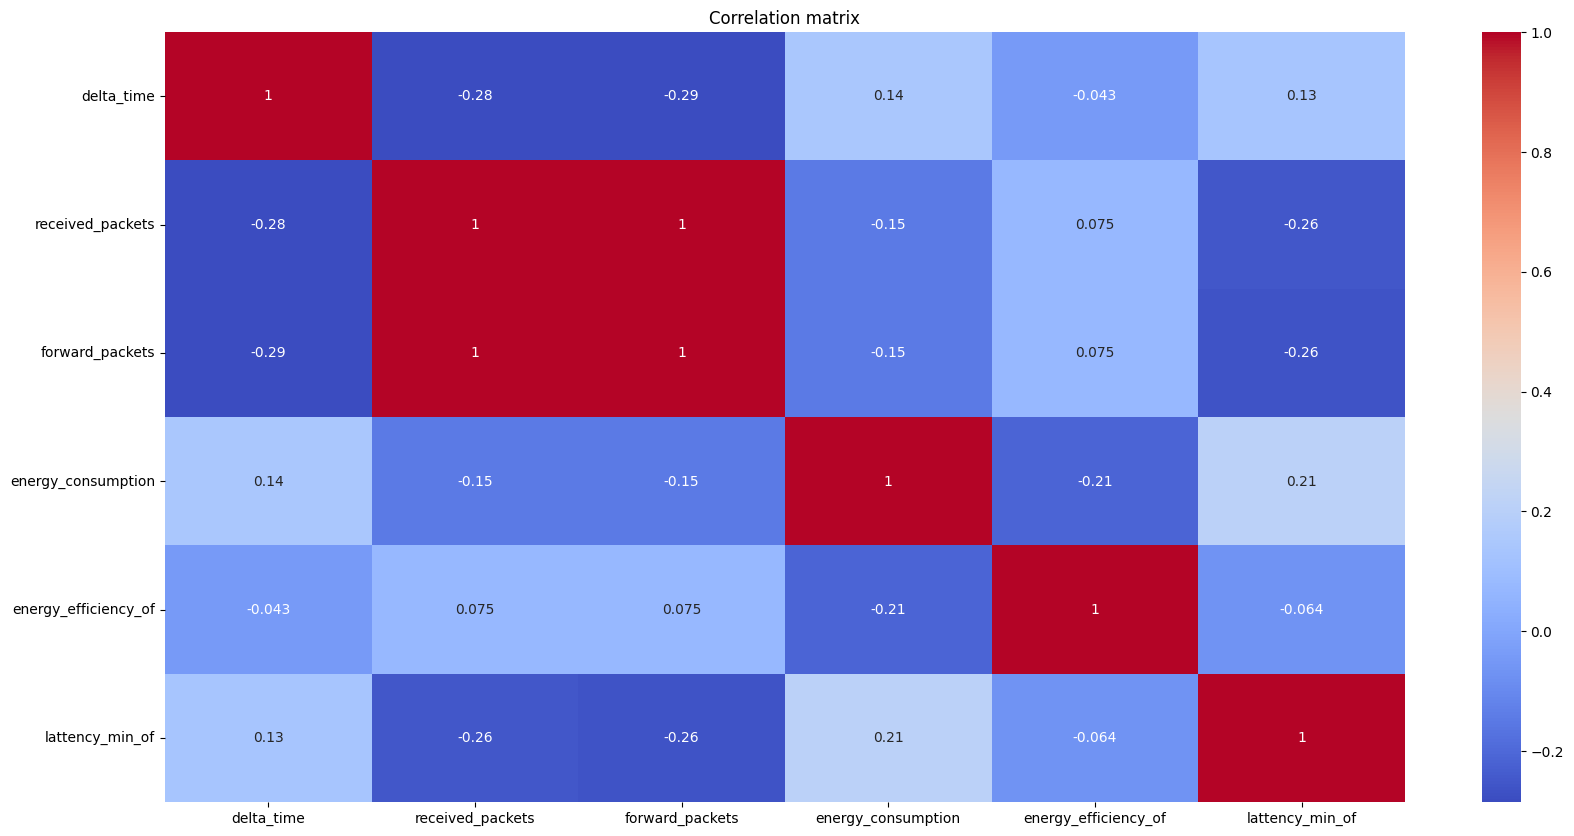

In [48]:
plt.figure(figsize=(20,10))
sns.heatmap(data[continous_feature].corr(),annot=True,cmap = 'coolwarm')
plt.title("Correlation matrix")
plt.show()

In [49]:
#sns.pairplot(data[discrete_feature])

In [50]:
data = pd.get_dummies(data, columns=['node_type'], drop_first=True)

In [59]:
data = data.drop(['rank_min','rank_max','ver','ver_min','ver_max','ver_diff'],axis=1)

In [60]:
X = data.drop(['energy_efficiency_of','data'],axis = 1)
y = data['energy_efficiency_of']

In [61]:
X = X.replace(r'[^0-9.]', '', regex=True)  # Remove non-numeric characters
X = X.astype(float)

In [62]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.78299355, -1.96198612, -1.57095965, ..., -0.13302684,
         3.95103526, -0.19342202],
       [-0.78291909, -1.94549347, -0.2994353 , ..., -0.31446571,
        -0.25309822, -0.19342202],
       [-0.78284463, -1.94549347, -0.03174596, ...,  2.133744  ,
        -0.25309822, -0.19342202],
       ...,
       [ 0.52839918,  1.61464272,  1.70823473, ..., -0.77738066,
        -0.25309822, -0.19342202],
       [ 0.52847363,  1.61471224, -1.30327031, ..., -0.3019434 ,
        -0.25309822, -0.19342202],
       [12.33383745,  1.61472962, -0.70096931, ...,         nan,
        -0.25309822, -0.19342202]])

In [63]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [64]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(13687, 26)
(3422, 26)
(13687,)
(3422,)


In [69]:
X_train = X_train.dropna()
y_train = y_train.dropna()

In [76]:
# Define regression models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Support Vector Regressor": SVR(kernel = 'linear'),
    "Random Forest Regressor": RandomForestRegressor()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    pred_y_train = model.predict(X_train)
    pred_y_test = model.predict(X_test)

    # Training Set Evaluation
    train_mse = mean_squared_error(y_train, pred_y_train)
    train_mae = mean_absolute_error(y_train, pred_y_train)
    train_r2 = r2_score(y_train, pred_y_train)

    # Testing Set Evaluation
    test_mse = mean_squared_error(y_test, pred_y_test)
    test_mae = mean_absolute_error(y_test, pred_y_test)
    test_r2 = r2_score(y_test, pred_y_test)

    print(f"\nModel: {name}")
    print("Training Set Performance")
    print(f"- MSE: {train_mse:.5f}")
    print(f"- MAE: {train_mae:.5f}")
    print(f"- R² Score: {train_r2:.5f}")

    print("----------------------------------")
    print("Testing Set Performance")
    print(f"- MSE: {test_mse:.5f}")
    print(f"- MAE: {test_mae:.5f}")
    print(f"- R² Score: {test_r2:.5f}")

    print("+" * 35)



Model: Linear Regression
Training Set Performance
- MSE: 0.00000
- MAE: 0.00086
- R² Score: 0.07663
----------------------------------
Testing Set Performance
- MSE: 0.00000
- MAE: 0.00089
- R² Score: 0.05948
+++++++++++++++++++++++++++++++++++

Model: Ridge Regression
Training Set Performance
- MSE: 0.00000
- MAE: 0.00088
- R² Score: 0.09861
----------------------------------
Testing Set Performance
- MSE: 0.00000
- MAE: 0.00090
- R² Score: 0.08714
+++++++++++++++++++++++++++++++++++

Model: Lasso Regression
Training Set Performance
- MSE: 0.00000
- MAE: 0.00098
- R² Score: 0.00585
----------------------------------
Testing Set Performance
- MSE: 0.00000
- MAE: 0.00099
- R² Score: 0.00640
+++++++++++++++++++++++++++++++++++

Model: Decision Tree Regressor
Training Set Performance
- MSE: 0.00000
- MAE: 0.00000
- R² Score: 1.00000
----------------------------------
Testing Set Performance
- MSE: 0.00000
- MAE: 0.00000
- R² Score: 1.00000
+++++++++++++++++++++++++++++++++++

Model: Supp

In [77]:
# Decision Tree Regressor with Hyperparameter Tuning

param_grid = {
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt', 'log2', None]
}

In [78]:
from sklearn.model_selection import RandomizedSearchCV
dtr = DecisionTreeRegressor()
dtr_rscv = RandomizedSearchCV(dtr, param_grid, cv=5, scoring='r2')
dtr_rscv.fit(X_train, y_train)

print("Best Decision Tree Parameters:", dtr_rscv.best_params_)

Best Decision Tree Parameters: {'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 15}


In [84]:
final_dtr = DecisionTreeRegressor(min_samples_split=2, min_samples_leaf=2,max_features=None,max_depth=15)
final_dtr.fit(X_train, y_train)
final_dtr_pred = final_dtr.predict(X_test)
final_dtr_r2 = r2_score(y_test, final_dtr_pred)
print("Final Decision Tree Performance")
print(f"- R² Score: {final_dtr_r2:.5f}")

Final Decision Tree Performance
- R² Score: 1.00000


In [85]:
# Random Forest Regressor with Hyperparameter Tuning

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

In [88]:
rf = RandomForestRegressor()
rf_rvcv = RandomizedSearchCV(rf, param_grid, cv=5, scoring='r2', n_jobs=-1)
rf_rvcv.fit(X_train, y_train)

print("Best Random Forest Parameters:", rf_rvcv.best_params_)

Best Random Forest Parameters: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 20}


In [90]:
final_rfr = RandomForestRegressor(n_estimators=50, min_samples_split=5,min_samples_leaf=1,max_features=None,max_depth=20)
final_rfr.fit(X_train, y_train)
final_rfr_pred = final_rfr.predict(X_test)
final_rfr_r2 = r2_score(y_test, final_rfr_pred)
print("Final Random Forest Performance")
print(f"- R² Score: {final_rfr_r2:.5f}")

Final Random Forest Performance
- R² Score: 1.00000
